In [1]:

import scipy.misc
import random

xs = []
ys = []

#points to the end of the last batch
train_batch_pointer = 0
val_batch_pointer = 0

#read data.txt
with open("driving_dataset/data.txt") as f:
    for line in f:
        xs.append("driving_dataset/" + line.split()[0])
        #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1]) * scipy.pi / 180)

#get number of images
num_images = len(xs)


train_xs = xs[:int(len(xs) * 0.8)]
train_ys = ys[:int(len(xs) * 0.8)]

val_xs = xs[-int(len(xs) * 0.2):]
val_ys = ys[-int(len(xs) * 0.2):]

num_train_images = len(train_xs)
num_val_images = len(val_xs)

def LoadTrainBatch(batch_size):
    global train_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], [66, 200]) / 255.0)
        y_out.append([train_ys[(train_batch_pointer + i) % num_train_images]])
    train_batch_pointer += batch_size
    return x_out, y_out

def LoadValBatch(batch_size):
    global val_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(val_xs[(val_batch_pointer + i) % num_val_images])[-150:], [66, 200]) / 255.0)
        y_out.append([val_ys[(val_batch_pointer + i) % num_val_images]])
    val_batch_pointer += batch_size
    return x_out, y_out


In [2]:
num_train_images

36324

In [3]:
num_val_images

9081

In [4]:
from __future__ import division

import os
import numpy as np
import random

from scipy import pi
from itertools import islice

LIMIT= None

DATA_FOLDER = './driving_dataset/' # change this to your folder
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')


split =0.8
X = []
y = []
with open(TRAIN_FILE) as fp:
    for line in islice(fp, LIMIT):
        path, angle = line.strip().split()
        full_path = os.path.join(DATA_FOLDER, path)
        X.append(full_path)
        
        # converting angle from degrees to radians
        y.append(float(angle) * pi / 180 )


y = np.array(y)
print("Completed processing data.txt")

split_index = int(len(y)*0.8)

train_y = y[:split_index]
test_y = y[split_index:]


Completed processing data.txt


In [5]:
len(train_y)

36324

In [6]:
len(test_y)

9082

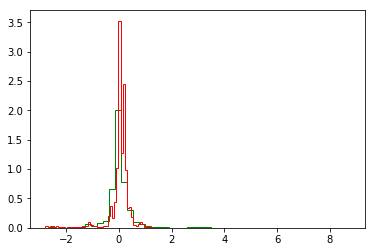

In [27]:
import numpy
# PDF of train and test 'y' values. 
import matplotlib.pyplot as plt 
plt.hist(train_y, bins=50, normed=1, color='green', histtype ='step');
plt.hist(test_y, bins=50, normed=1, color='red', histtype ='step');
plt.show()

In [7]:
scipy.misc.imresize(scipy.misc.imread(train_xs[0])[-150:], [66, 200])

/home/captain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/home/captain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


array([[[180, 162, 166],
        [176, 172, 173],
        [176, 176, 171],
        ...,
        [ 90,  88, 113],
        [106,  93,  99],
        [101, 103,  81]],

       [[191, 188, 192],
        [186, 193, 204],
        [187, 196, 200],
        ...,
        [ 84,  82,  97],
        [ 86,  88,  79],
        [ 86, 101,  74]],

       [[208, 201, 223],
        [199, 212, 230],
        [201, 212, 226],
        ...,
        [128, 124, 115],
        [128, 126, 117],
        [132, 126, 119]],

       ...,

       [[ 54,  43,  55],
        [ 59,  43,  56],
        [ 55,  41,  53],
        ...,
        [ 23,  24,  25],
        [ 24,  25,  27],
        [ 25,  26,  29]],

       [[ 56,  36,  58],
        [ 53,  35,  63],
        [ 51,  39,  54],
        ...,
        [ 23,  25,  22],
        [ 23,  26,  23],
        [ 24,  27,  25]],

       [[ 68,  37,  44],
        [ 53,  41,  49],
        [ 49,  49,  37],
        ...,
        [ 28,  25,  26],
        [ 26,  23,  25],
        [ 24,  22,  24]]

In [8]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
import scipy

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W, stride):
  return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='VALID')

x = tf.placeholder(tf.float32, shape=[None, 66, 200, 3])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

x_image = x

#first convolutional layer
W_conv1 = weight_variable([5, 5, 3, 24])
b_conv1 = bias_variable([24])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1, 2) + b_conv1)

#second convolutional layer
W_conv2 = weight_variable([5, 5, 24, 36])
b_conv2 = bias_variable([36])

h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2, 2) + b_conv2)

#third convolutional layer
W_conv3 = weight_variable([5, 5, 36, 48])
b_conv3 = bias_variable([48])

h_conv3 = tf.nn.relu(conv2d(h_conv2, W_conv3, 2) + b_conv3)

#fourth convolutional layer
W_conv4 = weight_variable([3, 3, 48, 64])
b_conv4 = bias_variable([64])

h_conv4 = tf.nn.relu(conv2d(h_conv3, W_conv4, 1) + b_conv4)

#fifth convolutional layer
W_conv5 = weight_variable([3, 3, 64, 64])
b_conv5 = bias_variable([64])

h_conv5 = tf.nn.relu(conv2d(h_conv4, W_conv5, 1) + b_conv5)

#FCL 1
W_fc1 = weight_variable([1152, 1164])
b_fc1 = bias_variable([1164])

h_conv5_flat = tf.reshape(h_conv5, [-1, 1152])
h_fc1 = tf.nn.relu(tf.matmul(h_conv5_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#FCL 2
W_fc2 = weight_variable([1164, 100])
b_fc2 = bias_variable([100])

h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

#FCL 3
W_fc3 = weight_variable([100, 50])
b_fc3 = bias_variable([50])

h_fc3 = tf.nn.relu(tf.matmul(h_fc2_drop, W_fc3) + b_fc3)

h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)

#FCL 3
W_fc4 = weight_variable([50, 10])
b_fc4 = bias_variable([10])

h_fc4 = tf.nn.relu(tf.matmul(h_fc3_drop, W_fc4) + b_fc4)

h_fc4_drop = tf.nn.dropout(h_fc4, keep_prob)

#Output
W_fc5 = weight_variable([10, 1])
b_fc5 = bias_variable([1])

y = tf.multiply(tf.atan(tf.matmul(h_fc4_drop, W_fc5) + b_fc5), 2) #scale the atan output


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
import os
from tensorflow.core.protobuf import saver_pb2

LOGDIR = './save'

sess = tf.InteractiveSession()

L2NormConst = 0.001

train_vars = tf.trainable_variables()

loss = tf.reduce_mean(tf.square(tf.subtract(y_,y))) + tf.add_n([tf.nn.l2_loss(v) for v in train_vars]) * L2NormConst
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)
sess.run(tf.initialize_all_variables())

# create a summary to monitor cost tensor
tf.summary.scalar("loss", loss)
# merge all summaries into a single op
merged_summary_op =  tf.summary.merge_all()

saver = tf.train.Saver(write_version = saver_pb2.SaverDef.V1)

# op to write logs to Tensorboard
logs_path = './logs'
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

epochs = 30
batch_size = 100

# train over the dataset about 30 times
for epoch in range(epochs):
  for i in range(int(num_images/batch_size)):
    xs, ys = LoadTrainBatch(batch_size)
    train_step.run(feed_dict={x: xs, y_: ys, keep_prob: 0.8})
    if i % 10 == 0:
      xs, ys = LoadValBatch(batch_size)
      loss_value = loss.eval(feed_dict={x:xs, y_: ys,keep_prob: 1.0})
      print("Epoch: %d, Step: %d, Loss: %g" % (epoch, epoch * batch_size + i, loss_value))

    # write logs at every iteration
    summary = merged_summary_op.eval(feed_dict={x:xs, y_: ys,keep_prob: 1.0})
    summary_writer.add_summary(summary, epoch * num_images/batch_size + i)

    if i % batch_size == 0:
      if not os.path.exists(LOGDIR):
        os.makedirs(LOGDIR)
      checkpoint_path = os.path.join(LOGDIR, "model.ckpt")
      filename = saver.save(sess, checkpoint_path)
  print("Model saved in file: %s" % filename)

print("Run the command line:\n" \
          "--> tensorboard --logdir=./logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

/home/captain/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/captain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/captain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
/home/captain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: DeprecationWarning: `imread` is deprecated!
`imread` is 

Epoch: 0, Step: 0, Loss: 13.2891
Epoch: 0, Step: 10, Loss: 12.2634
Epoch: 0, Step: 20, Loss: 12.0173
Epoch: 0, Step: 30, Loss: 11.8256
Epoch: 0, Step: 40, Loss: 11.7222
Epoch: 0, Step: 50, Loss: 11.7386
Epoch: 0, Step: 60, Loss: 12.4883
Epoch: 0, Step: 70, Loss: 13.0521
Epoch: 0, Step: 80, Loss: 11.3514
Epoch: 0, Step: 90, Loss: 10.9419
Epoch: 0, Step: 100, Loss: 10.7756
Epoch: 0, Step: 110, Loss: 10.6588
Epoch: 0, Step: 120, Loss: 10.506
Epoch: 0, Step: 130, Loss: 10.384
Epoch: 0, Step: 140, Loss: 10.3249
Epoch: 0, Step: 150, Loss: 10.1797
Epoch: 0, Step: 160, Loss: 9.97624
Epoch: 0, Step: 170, Loss: 9.87242
Epoch: 0, Step: 180, Loss: 10.0363
Epoch: 0, Step: 190, Loss: 9.58914
Epoch: 0, Step: 200, Loss: 9.54024
Epoch: 0, Step: 210, Loss: 9.31433
Epoch: 0, Step: 220, Loss: 9.19487
Epoch: 0, Step: 230, Loss: 9.07854
Epoch: 0, Step: 240, Loss: 8.96417
Epoch: 0, Step: 250, Loss: 8.85166
Epoch: 0, Step: 260, Loss: 13.6956
Epoch: 0, Step: 270, Loss: 9.51402
Epoch: 0, Step: 280, Loss: 8.5306

Epoch: 2, Step: 310, Loss: 3.98447
Epoch: 2, Step: 320, Loss: 3.96581
Epoch: 2, Step: 330, Loss: 3.97676
Epoch: 2, Step: 340, Loss: 3.91847
Epoch: 2, Step: 350, Loss: 3.85778
Epoch: 2, Step: 360, Loss: 3.91498
Epoch: 2, Step: 370, Loss: 4.17305
Epoch: 2, Step: 380, Loss: 3.86308
Epoch: 2, Step: 390, Loss: 3.80303
Epoch: 2, Step: 400, Loss: 3.69246
Epoch: 2, Step: 410, Loss: 3.66317
Epoch: 2, Step: 420, Loss: 3.634
Epoch: 2, Step: 430, Loss: 3.60563
Epoch: 2, Step: 440, Loss: 3.65121
Epoch: 2, Step: 450, Loss: 9.24636
Epoch: 2, Step: 460, Loss: 3.75287
Epoch: 2, Step: 470, Loss: 3.5051
Epoch: 2, Step: 480, Loss: 3.47182
Epoch: 2, Step: 490, Loss: 3.44315
Epoch: 2, Step: 500, Loss: 3.42326
Epoch: 2, Step: 510, Loss: 3.39339
Epoch: 2, Step: 520, Loss: 3.38398
Epoch: 2, Step: 530, Loss: 3.35288
Epoch: 2, Step: 540, Loss: 3.32418
Epoch: 2, Step: 550, Loss: 3.30003
Epoch: 2, Step: 560, Loss: 3.27891
Epoch: 2, Step: 570, Loss: 3.25658
Epoch: 2, Step: 580, Loss: 3.24316
Epoch: 2, Step: 590, Lo

Epoch: 4, Step: 610, Loss: 2.13333
Epoch: 4, Step: 620, Loss: 2.12158
Epoch: 4, Step: 630, Loss: 2.61087
Epoch: 4, Step: 640, Loss: 7.21247
Epoch: 4, Step: 650, Loss: 2.13874
Epoch: 4, Step: 660, Loss: 2.08618
Epoch: 4, Step: 670, Loss: 2.07596
Epoch: 4, Step: 680, Loss: 2.0702
Epoch: 4, Step: 690, Loss: 2.05802
Epoch: 4, Step: 700, Loss: 2.04599
Epoch: 4, Step: 710, Loss: 2.05337
Epoch: 4, Step: 720, Loss: 2.03114
Epoch: 4, Step: 730, Loss: 2.01992
Epoch: 4, Step: 740, Loss: 2.02767
Epoch: 4, Step: 750, Loss: 2.10009
Epoch: 4, Step: 760, Loss: 1.9971
Epoch: 4, Step: 770, Loss: 2.05192
Epoch: 4, Step: 780, Loss: 2.12245
Epoch: 4, Step: 790, Loss: 1.99709
Epoch: 4, Step: 800, Loss: 1.96817
Epoch: 4, Step: 810, Loss: 1.96958
Epoch: 4, Step: 820, Loss: 1.96768
Epoch: 4, Step: 830, Loss: 1.95147
Epoch: 4, Step: 840, Loss: 1.96732
Epoch: 4, Step: 850, Loss: 1.94888
Model saved in file: ./save/model.ckpt
Epoch: 5, Step: 500, Loss: 1.9537
Epoch: 5, Step: 510, Loss: 1.93921
Epoch: 5, Step: 520

Epoch: 6, Step: 910, Loss: 1.51676
Epoch: 6, Step: 920, Loss: 1.52615
Epoch: 6, Step: 930, Loss: 1.50539
Epoch: 6, Step: 940, Loss: 1.50494
Epoch: 6, Step: 950, Loss: 1.49517
Epoch: 6, Step: 960, Loss: 1.48905
Epoch: 6, Step: 970, Loss: 1.49302
Epoch: 6, Step: 980, Loss: 1.47673
Epoch: 6, Step: 990, Loss: 1.47576
Epoch: 6, Step: 1000, Loss: 1.46773
Epoch: 6, Step: 1010, Loss: 1.46688
Epoch: 6, Step: 1020, Loss: 1.46125
Epoch: 6, Step: 1030, Loss: 1.46084
Epoch: 6, Step: 1040, Loss: 1.45185
Epoch: 6, Step: 1050, Loss: 1.468
Model saved in file: ./save/model.ckpt
Epoch: 7, Step: 700, Loss: 1.45342
Epoch: 7, Step: 710, Loss: 1.46198
Epoch: 7, Step: 720, Loss: 1.4536
Epoch: 7, Step: 730, Loss: 1.46137
Epoch: 7, Step: 740, Loss: 1.46781
Epoch: 7, Step: 750, Loss: 1.42875
Epoch: 7, Step: 760, Loss: 1.52918
Epoch: 7, Step: 770, Loss: 1.50238
Epoch: 7, Step: 780, Loss: 6.25744
Epoch: 7, Step: 790, Loss: 3.55084
Epoch: 7, Step: 800, Loss: 1.49153
Epoch: 7, Step: 810, Loss: 1.56368
Epoch: 7, Ste

Epoch: 8, Step: 1210, Loss: 1.19072
Epoch: 8, Step: 1220, Loss: 1.1518
Epoch: 8, Step: 1230, Loss: 1.11938
Epoch: 8, Step: 1240, Loss: 1.20631
Epoch: 8, Step: 1250, Loss: 1.21285
Model saved in file: ./save/model.ckpt
Epoch: 9, Step: 900, Loss: 1.19623
Epoch: 9, Step: 910, Loss: 1.12196
Epoch: 9, Step: 920, Loss: 1.10194
Epoch: 9, Step: 930, Loss: 1.09623
Epoch: 9, Step: 940, Loss: 1.09901
Epoch: 9, Step: 950, Loss: 1.14501
Epoch: 9, Step: 960, Loss: 1.1157
Epoch: 9, Step: 970, Loss: 6.1872
Epoch: 9, Step: 980, Loss: 1.54644
Epoch: 9, Step: 990, Loss: 1.07741
Epoch: 9, Step: 1000, Loss: 1.09039
Epoch: 9, Step: 1010, Loss: 1.11651
Epoch: 9, Step: 1020, Loss: 1.12307
Epoch: 9, Step: 1030, Loss: 1.06954
Epoch: 9, Step: 1040, Loss: 1.16733
Epoch: 9, Step: 1050, Loss: 1.1383
Epoch: 9, Step: 1060, Loss: 1.05478
Epoch: 9, Step: 1070, Loss: 1.08544
Epoch: 9, Step: 1080, Loss: 1.08578
Epoch: 9, Step: 1090, Loss: 1.05344
Epoch: 9, Step: 1100, Loss: 1.04847
Epoch: 9, Step: 1110, Loss: 1.08561
Epo

Epoch: 11, Step: 1110, Loss: 0.889793
Epoch: 11, Step: 1120, Loss: 0.89236
Epoch: 11, Step: 1130, Loss: 0.899401
Epoch: 11, Step: 1140, Loss: 1.12901
Epoch: 11, Step: 1150, Loss: 1.06747
Epoch: 11, Step: 1160, Loss: 6.35536
Epoch: 11, Step: 1170, Loss: 0.867285
Epoch: 11, Step: 1180, Loss: 0.853091
Epoch: 11, Step: 1190, Loss: 0.845394
Epoch: 11, Step: 1200, Loss: 1.26563
Epoch: 11, Step: 1210, Loss: 1.57512
Epoch: 11, Step: 1220, Loss: 0.843
Epoch: 11, Step: 1230, Loss: 0.938022
Epoch: 11, Step: 1240, Loss: 0.875075
Epoch: 11, Step: 1250, Loss: 0.816579
Epoch: 11, Step: 1260, Loss: 0.856901
Epoch: 11, Step: 1270, Loss: 0.826254
Epoch: 11, Step: 1280, Loss: 0.821735
Epoch: 11, Step: 1290, Loss: 0.830767
Epoch: 11, Step: 1300, Loss: 0.882703
Epoch: 11, Step: 1310, Loss: 0.841182
Epoch: 11, Step: 1320, Loss: 0.915211
Epoch: 11, Step: 1330, Loss: 0.84757
Epoch: 11, Step: 1340, Loss: 0.830835
Epoch: 11, Step: 1350, Loss: 0.807789
Epoch: 11, Step: 1360, Loss: 0.801832
Epoch: 11, Step: 1370,

Epoch: 13, Step: 1410, Loss: 0.659772
Epoch: 13, Step: 1420, Loss: 0.77373
Epoch: 13, Step: 1430, Loss: 0.659835
Epoch: 13, Step: 1440, Loss: 0.644416
Epoch: 13, Step: 1450, Loss: 0.680599
Epoch: 13, Step: 1460, Loss: 0.643504
Epoch: 13, Step: 1470, Loss: 0.642314
Epoch: 13, Step: 1480, Loss: 0.692023
Epoch: 13, Step: 1490, Loss: 0.738385
Epoch: 13, Step: 1500, Loss: 0.692988
Epoch: 13, Step: 1510, Loss: 0.731009
Epoch: 13, Step: 1520, Loss: 0.666558
Epoch: 13, Step: 1530, Loss: 0.803282
Epoch: 13, Step: 1540, Loss: 0.623792
Epoch: 13, Step: 1550, Loss: 0.63389
Epoch: 13, Step: 1560, Loss: 0.65763
Epoch: 13, Step: 1570, Loss: 0.671532
Epoch: 13, Step: 1580, Loss: 0.721679
Epoch: 13, Step: 1590, Loss: 1.15994
Epoch: 13, Step: 1600, Loss: 1.31487
Epoch: 13, Step: 1610, Loss: 0.816062
Epoch: 13, Step: 1620, Loss: 0.807531
Epoch: 13, Step: 1630, Loss: 0.610508
Epoch: 13, Step: 1640, Loss: 0.623087
Epoch: 13, Step: 1650, Loss: 0.666564
Epoch: 13, Step: 1660, Loss: 0.610923
Epoch: 13, Step: 

Epoch: 15, Step: 1700, Loss: 0.644538
Epoch: 15, Step: 1710, Loss: 0.516276
Epoch: 15, Step: 1720, Loss: 0.524445
Epoch: 15, Step: 1730, Loss: 0.510271
Epoch: 15, Step: 1740, Loss: 0.509638
Epoch: 15, Step: 1750, Loss: 0.510601
Epoch: 15, Step: 1760, Loss: 0.512518
Epoch: 15, Step: 1770, Loss: 0.510259
Epoch: 15, Step: 1780, Loss: 0.506603
Epoch: 15, Step: 1790, Loss: 0.512591
Epoch: 15, Step: 1800, Loss: 0.50735
Epoch: 15, Step: 1810, Loss: 0.508939
Epoch: 15, Step: 1820, Loss: 0.492994
Epoch: 15, Step: 1830, Loss: 0.516425
Epoch: 15, Step: 1840, Loss: 0.556556
Epoch: 15, Step: 1850, Loss: 0.51425
Epoch: 15, Step: 1860, Loss: 0.907617
Epoch: 15, Step: 1870, Loss: 0.717687
Epoch: 15, Step: 1880, Loss: 0.553746
Epoch: 15, Step: 1890, Loss: 0.489373
Epoch: 15, Step: 1900, Loss: 0.484166
Epoch: 15, Step: 1910, Loss: 0.507995
Epoch: 15, Step: 1920, Loss: 0.530927
Epoch: 15, Step: 1930, Loss: 0.519196
Epoch: 15, Step: 1940, Loss: 0.533139
Epoch: 15, Step: 1950, Loss: 0.58278
Model saved in 

Epoch: 17, Step: 1940, Loss: 0.428307
Epoch: 17, Step: 1950, Loss: 0.422976
Epoch: 17, Step: 1960, Loss: 0.477325
Epoch: 17, Step: 1970, Loss: 0.639956
Epoch: 17, Step: 1980, Loss: 0.843368
Epoch: 17, Step: 1990, Loss: 1.51213
Epoch: 17, Step: 2000, Loss: 1.20905
Epoch: 17, Step: 2010, Loss: 0.713648
Epoch: 17, Step: 2020, Loss: 0.435748
Epoch: 17, Step: 2030, Loss: 0.447289
Epoch: 17, Step: 2040, Loss: 0.704504
Epoch: 17, Step: 2050, Loss: 0.823195
Epoch: 17, Step: 2060, Loss: 0.707861
Epoch: 17, Step: 2070, Loss: 0.440707
Epoch: 17, Step: 2080, Loss: 0.41177
Epoch: 17, Step: 2090, Loss: 0.411036
Epoch: 17, Step: 2100, Loss: 0.465042
Epoch: 17, Step: 2110, Loss: 0.566923
Epoch: 17, Step: 2120, Loss: 0.547422
Epoch: 17, Step: 2130, Loss: 0.484354
Epoch: 17, Step: 2140, Loss: 0.466
Epoch: 17, Step: 2150, Loss: 0.455079
Model saved in file: ./save/model.ckpt
Epoch: 18, Step: 1800, Loss: 0.402644
Epoch: 18, Step: 1810, Loss: 0.399661
Epoch: 18, Step: 1820, Loss: 0.402346
Epoch: 18, Step: 

Epoch: 19, Step: 2210, Loss: 0.386382
Epoch: 19, Step: 2220, Loss: 0.374829
Epoch: 19, Step: 2230, Loss: 0.605699
Epoch: 19, Step: 2240, Loss: 0.704507
Epoch: 19, Step: 2250, Loss: 0.592254
Epoch: 19, Step: 2260, Loss: 0.375647
Epoch: 19, Step: 2270, Loss: 0.455944
Epoch: 19, Step: 2280, Loss: 0.353404
Epoch: 19, Step: 2290, Loss: 0.381124
Epoch: 19, Step: 2300, Loss: 0.390523
Epoch: 19, Step: 2310, Loss: 0.444663
Epoch: 19, Step: 2320, Loss: 0.372385
Epoch: 19, Step: 2330, Loss: 0.391298
Epoch: 19, Step: 2340, Loss: 0.405189
Epoch: 19, Step: 2350, Loss: 0.354752
Model saved in file: ./save/model.ckpt
Epoch: 20, Step: 2000, Loss: 0.354623
Epoch: 20, Step: 2010, Loss: 0.409965
Epoch: 20, Step: 2020, Loss: 0.39797
Epoch: 20, Step: 2030, Loss: 0.485242
Epoch: 20, Step: 2040, Loss: 0.56894
Epoch: 20, Step: 2050, Loss: 1.76148
Epoch: 20, Step: 2060, Loss: 1.83128
Epoch: 20, Step: 2070, Loss: 0.423862
Epoch: 20, Step: 2080, Loss: 0.537665
Epoch: 20, Step: 2090, Loss: 0.351278
Epoch: 20, Step

Epoch: 21, Step: 2510, Loss: 0.389703
Epoch: 21, Step: 2520, Loss: 0.36003
Epoch: 21, Step: 2530, Loss: 0.322591
Epoch: 21, Step: 2540, Loss: 0.314069
Epoch: 21, Step: 2550, Loss: 0.313435
Model saved in file: ./save/model.ckpt
Epoch: 22, Step: 2200, Loss: 0.32119
Epoch: 22, Step: 2210, Loss: 0.340823
Epoch: 22, Step: 2220, Loss: 0.348093
Epoch: 22, Step: 2230, Loss: 0.314479
Epoch: 22, Step: 2240, Loss: 0.412086
Epoch: 22, Step: 2250, Loss: 0.537602
Epoch: 22, Step: 2260, Loss: 0.371282
Epoch: 22, Step: 2270, Loss: 0.475339
Epoch: 22, Step: 2280, Loss: 0.335669
Epoch: 22, Step: 2290, Loss: 0.341141
Epoch: 22, Step: 2300, Loss: 0.337231
Epoch: 22, Step: 2310, Loss: 0.331658
Epoch: 22, Step: 2320, Loss: 0.404145
Epoch: 22, Step: 2330, Loss: 5.93257
Epoch: 22, Step: 2340, Loss: 0.49278
Epoch: 22, Step: 2350, Loss: 0.324236
Epoch: 22, Step: 2360, Loss: 0.342211
Epoch: 22, Step: 2370, Loss: 0.321427
Epoch: 22, Step: 2380, Loss: 0.319966
Epoch: 22, Step: 2390, Loss: 0.575219
Epoch: 22, Step

Epoch: 24, Step: 2410, Loss: 0.314658
Epoch: 24, Step: 2420, Loss: 0.793217
Epoch: 24, Step: 2430, Loss: 2.55792
Epoch: 24, Step: 2440, Loss: 2.93777
Epoch: 24, Step: 2450, Loss: 0.904245
Epoch: 24, Step: 2460, Loss: 0.334737
Epoch: 24, Step: 2470, Loss: 0.300019
Epoch: 24, Step: 2480, Loss: 0.298617
Epoch: 24, Step: 2490, Loss: 0.297434
Epoch: 24, Step: 2500, Loss: 0.294774
Epoch: 24, Step: 2510, Loss: 0.718382
Epoch: 24, Step: 2520, Loss: 6.05602
Epoch: 24, Step: 2530, Loss: 0.365058
Epoch: 24, Step: 2540, Loss: 0.292106
Epoch: 24, Step: 2550, Loss: 0.292444
Epoch: 24, Step: 2560, Loss: 0.29005
Epoch: 24, Step: 2570, Loss: 0.292492
Epoch: 24, Step: 2580, Loss: 0.285256
Epoch: 24, Step: 2590, Loss: 0.286689
Epoch: 24, Step: 2600, Loss: 0.283703
Epoch: 24, Step: 2610, Loss: 0.281779
Epoch: 24, Step: 2620, Loss: 0.282579
Epoch: 24, Step: 2630, Loss: 0.307581
Epoch: 24, Step: 2640, Loss: 0.292493
Epoch: 24, Step: 2650, Loss: 0.304669
Epoch: 24, Step: 2660, Loss: 0.320927
Epoch: 24, Step:

Epoch: 26, Step: 2670, Loss: 0.272581
Epoch: 26, Step: 2680, Loss: 0.276068
Epoch: 26, Step: 2690, Loss: 0.281075
Epoch: 26, Step: 2700, Loss: 1.03855
Epoch: 26, Step: 2710, Loss: 5.22738
Epoch: 26, Step: 2720, Loss: 0.327394
Epoch: 26, Step: 2730, Loss: 0.312032
Epoch: 26, Step: 2740, Loss: 0.32304
Epoch: 26, Step: 2750, Loss: 0.271422
Epoch: 26, Step: 2760, Loss: 0.299833
Epoch: 26, Step: 2770, Loss: 0.424096
Epoch: 26, Step: 2780, Loss: 0.493032
Epoch: 26, Step: 2790, Loss: 0.270018
Epoch: 26, Step: 2800, Loss: 1.26592
Epoch: 26, Step: 2810, Loss: 2.4883
Epoch: 26, Step: 2820, Loss: 3.2307
Epoch: 26, Step: 2830, Loss: 0.734001
Epoch: 26, Step: 2840, Loss: 0.984556
Epoch: 26, Step: 2850, Loss: 0.300997
Epoch: 26, Step: 2860, Loss: 0.265721
Epoch: 26, Step: 2870, Loss: 0.308073
Epoch: 26, Step: 2880, Loss: 0.273965
Epoch: 26, Step: 2890, Loss: 0.268476
Epoch: 26, Step: 2900, Loss: 0.269005
Epoch: 26, Step: 2910, Loss: 0.266815
Epoch: 26, Step: 2920, Loss: 0.260876
Epoch: 26, Step: 293

Epoch: 28, Step: 2920, Loss: 0.269314
Epoch: 28, Step: 2930, Loss: 0.287917
Epoch: 28, Step: 2940, Loss: 0.250189
Epoch: 28, Step: 2950, Loss: 0.254235
Epoch: 28, Step: 2960, Loss: 0.266193
Epoch: 28, Step: 2970, Loss: 0.253281
Epoch: 28, Step: 2980, Loss: 0.249854
Epoch: 28, Step: 2990, Loss: 0.250006
Epoch: 28, Step: 3000, Loss: 0.25365
Epoch: 28, Step: 3010, Loss: 0.295425
Epoch: 28, Step: 3020, Loss: 0.269069
Epoch: 28, Step: 3030, Loss: 0.271268
Epoch: 28, Step: 3040, Loss: 0.254287
Epoch: 28, Step: 3050, Loss: 0.259473
Epoch: 28, Step: 3060, Loss: 0.263142
Epoch: 28, Step: 3070, Loss: 0.304329
Epoch: 28, Step: 3080, Loss: 0.274986
Epoch: 28, Step: 3090, Loss: 0.2635
Epoch: 28, Step: 3100, Loss: 0.257937
Epoch: 28, Step: 3110, Loss: 0.250892
Epoch: 28, Step: 3120, Loss: 0.264114
Epoch: 28, Step: 3130, Loss: 0.281478
Epoch: 28, Step: 3140, Loss: 0.254353
Epoch: 28, Step: 3150, Loss: 0.254393
Epoch: 28, Step: 3160, Loss: 0.293629
Epoch: 28, Step: 3170, Loss: 0.277269
Epoch: 28, Step

In [18]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [24]:
#To run the model with given datasets

import scipy.misc
import model
import cv2
from subprocess import call
import math

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, "save/model.ckpt")

img = cv2.imread('steering_wheel_image_2.jpg',0)
rows,cols = img.shape

smoothed_angle = 0


#read data.txt
xs = []
ys = []
with open("driving_dataset/data.txt") as f:
    for line in f:
        xs.append("driving_dataset/" + line.split()[0])
        #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1]) * scipy.pi / 180)

#get number of images
num_images = len(xs)


i = math.ceil(num_images*0.8)
print("Starting frameofvideo:" +str(i))

while(cv2.waitKey(10) != ord('q')):
    full_image = scipy.misc.imread("driving_dataset/" + str(i) + ".jpg", mode="RGB")
    image = scipy.misc.imresize(full_image[-150:], [66, 200]) / 255.0
    degrees = model.y.eval(feed_dict={model.x: [image], model.keep_prob: 1.0})[0][0] * 180.0 / scipy.pi
    #call("clear")
    #print("Predicted Steering angle: " + str(degrees))
    print("Steering angle: " + str(degrees) + " (pred)\t" + str(ys[i]*180/scipy.pi) + " (actual)")
    cv2.imshow("frame", cv2.cvtColor(full_image, cv2.COLOR_RGB2BGR))
    #make smooth angle transitions by turning the steering wheel based on the difference of the current angle
    #and the predicted angle
    smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow("steering wheel", dst)
    i += 1

cv2.destroyAllWindows()

INFO:tensorflow:Restoring parameters from save/model.ckpt
Starting frameofvideo:36325
Steering angle: 128.01906889662774 (pred)	-10.79 (actual)
Steering angle: 138.99668553445562 (pred)	-10.08 (actual)
Steering angle: 137.21367831200214 (pred)	-9.380000000000003 (actual)
Steering angle: 142.7407903317815 (pred)	-7.559999999999999 (actual)
Steering angle: 145.0097245325464 (pred)	-5.949999999999999 (actual)


/home/captain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/captain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


Steering angle: 144.70045356692822 (pred)	-3.23 (actual)
Steering angle: 128.36744952543341 (pred)	-0.81 (actual)
Steering angle: 110.6647739892976 (pred)	1.21 (actual)
Steering angle: 105.97489289760004 (pred)	3.4300000000000006 (actual)
Steering angle: 35.21058139789953 (pred)	4.44 (actual)
Steering angle: 12.00871736285865 (pred)	5.340000000000001 (actual)
Steering angle: 15.583541044247653 (pred)	5.75 (actual)
Steering angle: 1.8865957923966061 (pred)	7.16 (actual)
Steering angle: 3.2463475044852173 (pred)	8.27 (actual)
Steering angle: 3.8152890288557626 (pred)	9.48 (actual)
Steering angle: 0.05469956663299381 (pred)	0.0 (actual)
Steering angle: 0.9318380127097853 (pred)	9.88 (actual)
Steering angle: 2.5001937338909292 (pred)	9.979999999999999 (actual)
Steering angle: 3.405471061909239 (pred)	10.389999999999999 (actual)
Steering angle: 2.64125314850756 (pred)	11.6 (actual)
Steering angle: -0.20534173999020552 (pred)	11.39 (actual)
Steering angle: 1.9165959042220062 (pred)	10.89 (ac

Steering angle: 11.050195935495742 (pred)	47.7 (actual)
Steering angle: 11.947584608466098 (pred)	47.7 (actual)
Steering angle: 12.36883311043205 (pred)	47.8 (actual)
Steering angle: 15.143647833394859 (pred)	47.8 (actual)
Steering angle: 17.28814281767127 (pred)	48.0 (actual)
Steering angle: 23.805131955745797 (pred)	0.0 (actual)
Steering angle: 23.612015187152856 (pred)	48.5 (actual)
Steering angle: 30.637394088171646 (pred)	48.71000000000001 (actual)
Steering angle: 36.71678837404909 (pred)	48.91 (actual)
Steering angle: 50.77593364838744 (pred)	49.11 (actual)
Steering angle: 50.552702575743915 (pred)	49.21 (actual)
Steering angle: 47.45336763606723 (pred)	49.41 (actual)
Steering angle: 48.83967405643179 (pred)	49.92 (actual)
Steering angle: 50.4158392451552 (pred)	50.12 (actual)
Steering angle: 60.407996189533655 (pred)	50.22 (actual)
Steering angle: 59.415979514481 (pred)	50.32 (actual)
Steering angle: 58.37890408147378 (pred)	50.32 (actual)
Steering angle: 50.9069776578033 (pred)

Steering angle: 7.247605082080679 (pred)	24.200000000000003 (actual)
Steering angle: 5.330440991497093 (pred)	24.200000000000003 (actual)
Steering angle: 4.833004717547411 (pred)	24.4 (actual)
Steering angle: 4.179098201222845 (pred)	24.71 (actual)
Steering angle: 4.251230121500058 (pred)	24.91 (actual)
Steering angle: 5.392645231815691 (pred)	25.41 (actual)
Steering angle: 7.005822361877751 (pred)	25.61 (actual)
Steering angle: 7.323771936610076 (pred)	25.71 (actual)
Steering angle: 9.342494109962582 (pred)	25.820000000000004 (actual)
Steering angle: 11.794465427652753 (pred)	26.12 (actual)
Steering angle: 12.021950000601905 (pred)	26.520000000000003 (actual)
Steering angle: 15.608563442271993 (pred)	26.82 (actual)
Steering angle: 18.168429550733563 (pred)	27.03 (actual)
Steering angle: 12.103353902677409 (pred)	27.43 (actual)
Steering angle: 11.617845273452685 (pred)	27.73 (actual)
Steering angle: 11.544778471032828 (pred)	28.13 (actual)
Steering angle: 13.607501576792203 (pred)	28.4

Steering angle: 5.160235665588137 (pred)	16.74 (actual)
Steering angle: 5.290992807058861 (pred)	17.34 (actual)
Steering angle: 4.609800111886917 (pred)	17.850000000000005 (actual)
Steering angle: 4.161697440538592 (pred)	17.95 (actual)
Steering angle: 4.281668005762573 (pred)	17.95 (actual)
Steering angle: 4.2354267713079405 (pred)	18.05 (actual)
Steering angle: 3.9897333409183577 (pred)	18.05 (actual)
Steering angle: 3.9007009713135954 (pred)	18.05 (actual)
Steering angle: 3.9042035776973423 (pred)	18.05 (actual)
Steering angle: 3.8245763785796876 (pred)	18.05 (actual)
Steering angle: 3.768196155188994 (pred)	18.05 (actual)
Steering angle: 3.75898265688547 (pred)	17.95 (actual)
Steering angle: 3.734020449903189 (pred)	17.75 (actual)
Steering angle: 3.657311875995245 (pred)	17.04 (actual)
Steering angle: 3.509989604796536 (pred)	16.03 (actual)
Steering angle: 2.52337774381148 (pred)	15.230000000000002 (actual)
Steering angle: 2.279497728646535 (pred)	14.32 (actual)
Steering angle: 1.6

Steering angle: -0.042603301612901226 (pred)	-1.41 (actual)
Steering angle: -0.47415584096795776 (pred)	-1.51 (actual)
Steering angle: -0.6782580617063646 (pred)	-2.52 (actual)
Steering angle: -0.9706435190358011 (pred)	-3.03 (actual)
Steering angle: -1.1869163364623774 (pred)	-3.13 (actual)
Steering angle: -1.7381280771297447 (pred)	-3.4300000000000006 (actual)
Steering angle: -1.9178208559609655 (pred)	-3.4300000000000006 (actual)
Steering angle: -2.8691878736116982 (pred)	-3.4300000000000006 (actual)
Steering angle: -3.3720409144600234 (pred)	-3.4300000000000006 (actual)
Steering angle: -3.955314310143371 (pred)	-4.13 (actual)
Steering angle: -3.724365977511376 (pred)	-4.44 (actual)
Steering angle: -3.3034506607108742 (pred)	-4.54 (actual)
Steering angle: -3.0660281625193537 (pred)	-4.74 (actual)
Steering angle: -3.7269268715633075 (pred)	-5.75 (actual)
Steering angle: -2.31500766869802 (pred)	-6.76 (actual)
Steering angle: -2.2504692112305693 (pred)	-7.760000000000002 (actual)
Stee

Steering angle: -6.959138445787537 (pred)	-19.56 (actual)
Steering angle: -7.280854442960301 (pred)	-19.56 (actual)
Steering angle: -7.555281198527658 (pred)	-19.56 (actual)
Steering angle: -7.490490024060917 (pred)	-19.56 (actual)
Steering angle: -8.44449157374057 (pred)	-19.56 (actual)
Steering angle: -8.881903718377357 (pred)	-19.56 (actual)
Steering angle: -9.134997231845826 (pred)	-19.56 (actual)
Steering angle: -9.75482409241979 (pred)	-19.46 (actual)
Steering angle: -9.48859100253551 (pred)	-19.46 (actual)
Steering angle: -9.05560738180183 (pred)	-19.46 (actual)
Steering angle: -8.86373370763783 (pred)	-19.46 (actual)
Steering angle: -9.955314903995404 (pred)	-19.36 (actual)
Steering angle: -10.915383369205323 (pred)	-19.36 (actual)
Steering angle: -12.196825041469033 (pred)	-19.36 (actual)
Steering angle: -12.60043628745072 (pred)	-19.87 (actual)
Steering angle: -13.213986204177441 (pred)	-20.97 (actual)
Steering angle: -15.163118995171272 (pred)	-22.29 (actual)
Steering angle:

Steering angle: -83.67386763483401 (pred)	-77.85 (actual)
Steering angle: -90.36121022854512 (pred)	-77.95 (actual)
Steering angle: -89.68181814199312 (pred)	-77.85 (actual)
Steering angle: -94.80758824614256 (pred)	-77.24 (actual)
Steering angle: -92.98112736018945 (pred)	-76.84 (actual)
Steering angle: -93.27707262673692 (pred)	-76.44 (actual)
Steering angle: -94.28830262392482 (pred)	-75.63 (actual)
Steering angle: -95.29371329993987 (pred)	-74.32 (actual)
Steering angle: -96.91123186899311 (pred)	-73.61 (actual)
Steering angle: -94.74253752448735 (pred)	-72.5 (actual)
Steering angle: -93.37592595459452 (pred)	-71.7 (actual)
Steering angle: -89.95568140695396 (pred)	-70.08 (actual)
Steering angle: -86.86340205268989 (pred)	-69.07999999999998 (actual)
Steering angle: -80.42412509944448 (pred)	-68.97 (actual)
Steering angle: -79.29373562199655 (pred)	-68.97 (actual)
Steering angle: -79.67208712088022 (pred)	-68.37 (actual)
Steering angle: -79.86825698403216 (pred)	-67.16 (actual)
Stee

Steering angle: 3.7941098929000225 (pred)	4.24 (actual)
Steering angle: 3.7569715930617242 (pred)	4.24 (actual)
Steering angle: 3.7235100694310086 (pred)	4.34 (actual)
Steering angle: 3.721556635328385 (pred)	4.34 (actual)
Steering angle: 3.677481424614293 (pred)	4.24 (actual)
Steering angle: 3.6644097232033577 (pred)	4.24 (actual)
Steering angle: 3.6001910039664287 (pred)	4.13 (actual)
Steering angle: 3.4940357769992674 (pred)	4.34 (actual)
Steering angle: 3.288122862439719 (pred)	4.74 (actual)
Steering angle: 3.3126831554780276 (pred)	5.24 (actual)
Steering angle: 3.3808813136801352 (pred)	5.75 (actual)
Steering angle: 3.3251367247690764 (pred)	5.75 (actual)
Steering angle: 3.054684498968432 (pred)	5.849999999999999 (actual)
Steering angle: 3.4954118466736133 (pred)	5.849999999999999 (actual)
Steering angle: 3.434753576984965 (pred)	5.849999999999999 (actual)
Steering angle: 3.1865639258971536 (pred)	5.55 (actual)
Steering angle: 3.258410472333106 (pred)	5.24 (actual)
Steering angle:

Steering angle: -42.837372115716285 (pred)	1.21 (actual)
Steering angle: -53.204106879461996 (pred)	0.0 (actual)
Steering angle: -40.7725000616893 (pred)	0.91 (actual)
Steering angle: -35.571898404993206 (pred)	0.61 (actual)
Steering angle: -24.40646351782101 (pred)	0.4 (actual)
Steering angle: -20.067275073963174 (pred)	0.4 (actual)
Steering angle: -19.1519767912154 (pred)	0.4 (actual)
Steering angle: -5.919387286172959 (pred)	1.41 (actual)
Steering angle: -3.570520662211893 (pred)	2.32 (actual)
Steering angle: -2.142927669305307 (pred)	3.23 (actual)
Steering angle: -1.3016627674666512 (pred)	3.9300000000000006 (actual)
Steering angle: -0.016695543652449917 (pred)	4.13 (actual)
Steering angle: -0.35026765532687154 (pred)	4.24 (actual)
Steering angle: -0.30516615532913194 (pred)	4.24 (actual)
Steering angle: -0.30380780145794567 (pred)	4.24 (actual)
Steering angle: -0.5051387529818991 (pred)	4.24 (actual)
Steering angle: -1.0183450265906413 (pred)	4.24 (actual)
Steering angle: -0.83994

Steering angle: -0.48025295874095775 (pred)	-5.340000000000001 (actual)
Steering angle: -0.44180859866730626 (pred)	-5.04 (actual)
Steering angle: -0.1982584202742924 (pred)	-4.44 (actual)
Steering angle: -0.1957709640961516 (pred)	-3.4300000000000006 (actual)
Steering angle: -0.18235820679396553 (pred)	-2.7200000000000006 (actual)
Steering angle: -0.04326711062286184 (pred)	-2.12 (actual)
Steering angle: 0.24822745725208423 (pred)	-1.51 (actual)
Steering angle: 0.7571581658425305 (pred)	-0.81 (actual)
Steering angle: 0.7086431720853713 (pred)	0.2 (actual)
Steering angle: 0.6966711311308084 (pred)	1.11 (actual)
Steering angle: 0.9117709169282878 (pred)	1.51 (actual)
Steering angle: 1.083109413909231 (pred)	1.6100000000000003 (actual)
Steering angle: 1.0657336261041301 (pred)	1.82 (actual)
Steering angle: 1.0168627688190428 (pred)	2.12 (actual)
Steering angle: 0.7051300002527517 (pred)	2.42 (actual)
Steering angle: 0.8602004807346056 (pred)	2.7200000000000006 (actual)
Steering angle: 0.

Steering angle: 7.0711936755371205 (pred)	12.81 (actual)
Steering angle: 7.605442107792232 (pred)	12.81 (actual)
Steering angle: 7.57926711534545 (pred)	12.81 (actual)
Steering angle: 7.515468025855654 (pred)	12.81 (actual)
Steering angle: 7.112856121926906 (pred)	12.709999999999999 (actual)
Steering angle: 6.907726758131205 (pred)	12.61 (actual)
Steering angle: 6.274657441417056 (pred)	12.4 (actual)
Steering angle: 5.878728023817519 (pred)	12.2 (actual)
Steering angle: 5.504808037044702 (pred)	11.5 (actual)
Steering angle: 5.87002465526763 (pred)	10.389999999999999 (actual)
Steering angle: 5.603999459266212 (pred)	9.68 (actual)
Steering angle: 4.562747365581523 (pred)	9.380000000000003 (actual)
Steering angle: 4.6377330242713315 (pred)	8.77 (actual)
Steering angle: 4.293070152808263 (pred)	8.37 (actual)
Steering angle: 4.239815594736497 (pred)	7.969999999999999 (actual)
Steering angle: 4.437373266950416 (pred)	7.559999999999999 (actual)
Steering angle: 4.065264134081297 (pred)	7.06 (a

Steering angle: -1.5696799241064803 (pred)	-8.87 (actual)
Steering angle: -1.6377528977477067 (pred)	-8.87 (actual)
Steering angle: -1.9255171984951005 (pred)	-8.87 (actual)
Steering angle: -1.9611131562414452 (pred)	-8.87 (actual)
Steering angle: -1.77441516464273 (pred)	-8.87 (actual)
Steering angle: -2.1923880572931314 (pred)	-8.77 (actual)
Steering angle: -2.373946438263118 (pred)	-8.77 (actual)
Steering angle: -2.105943048723334 (pred)	-8.87 (actual)
Steering angle: -2.086721615738449 (pred)	-8.87 (actual)
Steering angle: -1.5558957485877485 (pred)	-8.87 (actual)
Steering angle: -1.047848135432217 (pred)	-8.87 (actual)
Steering angle: -1.0374175827959613 (pred)	-8.87 (actual)
Steering angle: -1.0721701189015151 (pred)	-8.87 (actual)
Steering angle: -0.7651678966656927 (pred)	-8.87 (actual)
Steering angle: -0.9038602772089436 (pred)	-8.87 (actual)
Steering angle: -0.8037225002614165 (pred)	-8.97 (actual)
Steering angle: -0.6619314549908012 (pred)	-8.97 (actual)
Steering angle: -0.7

Steering angle: -4.386553244430935 (pred)	-1.92 (actual)
Steering angle: -4.664093285599349 (pred)	-1.92 (actual)
Steering angle: -4.338856325909444 (pred)	-1.92 (actual)
Steering angle: -4.406205406220354 (pred)	-1.92 (actual)
Steering angle: -4.469097361211009 (pred)	-1.92 (actual)
Steering angle: -4.6533037211448445 (pred)	-1.92 (actual)
Steering angle: -4.306910250500825 (pred)	-2.12 (actual)
Steering angle: -4.532698375214875 (pred)	-2.22 (actual)
Steering angle: -4.686360129180414 (pred)	-2.22 (actual)
Steering angle: -5.280387657711946 (pred)	-1.82 (actual)
Steering angle: -5.344441598635149 (pred)	-1.82 (actual)
Steering angle: -4.982326740069053 (pred)	-1.82 (actual)
Steering angle: -5.456528844896466 (pred)	-1.71 (actual)
Steering angle: -5.22567997689426 (pred)	-1.21 (actual)
Steering angle: -5.071987060190633 (pred)	-0.91 (actual)
Steering angle: -4.66374793415944 (pred)	-0.91 (actual)
Steering angle: -4.310468779058401 (pred)	-0.81 (actual)
Steering angle: -4.0185917439353

Steering angle: 0.526920172884217 (pred)	17.850000000000005 (actual)
Steering angle: 0.36020763496207636 (pred)	18.05 (actual)
Steering angle: 3.039963093429527 (pred)	18.45 (actual)
Steering angle: 6.939822243927918 (pred)	19.060000000000002 (actual)
Steering angle: 5.98876450578054 (pred)	20.07 (actual)
Steering angle: 12.003334320019034 (pred)	21.28 (actual)
Steering angle: 10.961507636670419 (pred)	22.179999999999996 (actual)
Steering angle: 10.336630704978877 (pred)	23.09 (actual)
Steering angle: 17.221142077008032 (pred)	24.1 (actual)
Steering angle: 19.457714841485387 (pred)	24.810000000000002 (actual)
Steering angle: 14.524829279497117 (pred)	25.11 (actual)
Steering angle: 18.36167267782615 (pred)	25.31 (actual)
Steering angle: 14.604616134286623 (pred)	25.71 (actual)
Steering angle: 16.835922822913897 (pred)	26.520000000000003 (actual)
Steering angle: 18.266627180430834 (pred)	27.23 (actual)
Steering angle: 11.95711186858462 (pred)	27.93 (actual)
Steering angle: 12.40340069782

Steering angle: 102.17886500220371 (pred)	73.31 (actual)
Steering angle: 70.92845460583425 (pred)	73.40999999999998 (actual)
Steering angle: 58.716253954769876 (pred)	0.0 (actual)
Steering angle: 66.96433575496391 (pred)	73.01 (actual)
Steering angle: 86.70337755062566 (pred)	71.0 (actual)
Steering angle: 104.63047261232057 (pred)	70.79000000000002 (actual)
Steering angle: 90.6188927753622 (pred)	69.48 (actual)
Steering angle: 82.16449145090958 (pred)	68.17 (actual)
Steering angle: 103.13645069365033 (pred)	66.55 (actual)
Steering angle: 104.49987256520076 (pred)	65.45 (actual)
Steering angle: 109.60058270528542 (pred)	62.620000000000005 (actual)
Steering angle: 51.42874263868975 (pred)	59.38999999999999 (actual)
Steering angle: 77.50312639899683 (pred)	54.35 (actual)
Steering angle: 61.49025332390051 (pred)	51.43 (actual)
Steering angle: 70.3526423380455 (pred)	49.41 (actual)
Steering angle: 63.25755794145214 (pred)	46.59 (actual)
Steering angle: 46.35436629295008 (pred)	44.47 (actual

Steering angle: -0.5838292556879103 (pred)	38.32 (actual)
Steering angle: -0.8516687740484663 (pred)	42.05 (actual)
Steering angle: -0.7924950566480906 (pred)	45.279999999999994 (actual)
Steering angle: -0.9020384309695485 (pred)	47.8 (actual)
Steering angle: -0.8224413807337768 (pred)	51.93 (actual)
Steering angle: -1.136099408872365 (pred)	55.660000000000004 (actual)
Steering angle: -1.0431024346195277 (pred)	58.180000000000014 (actual)
Steering angle: -1.0539534707765623 (pred)	60.1 (actual)
Steering angle: -1.2642252199653419 (pred)	0.0 (actual)
Steering angle: -1.0361442861242829 (pred)	59.19 (actual)
Steering angle: -1.168141747259599 (pred)	57.18 (actual)
Steering angle: -1.4615854570235645 (pred)	54.15 (actual)
Steering angle: -0.8520666325676196 (pred)	51.93 (actual)
Steering angle: -0.8550418736422477 (pred)	50.22 (actual)
Steering angle: -1.0612257012519217 (pred)	0.0 (actual)
Steering angle: -1.1831712583630947 (pred)	46.89 (actual)
Steering angle: -1.5503720465399122 (pred

Steering angle: -0.17473744990795023 (pred)	8.27 (actual)
Steering angle: -0.08132491467301298 (pred)	8.27 (actual)
Steering angle: -0.0852108654239271 (pred)	8.27 (actual)
Steering angle: 0.05438110906294197 (pred)	8.27 (actual)
Steering angle: 0.09356204567463046 (pred)	8.27 (actual)
Steering angle: 0.34510878143024915 (pred)	8.27 (actual)
Steering angle: 0.10878438956026003 (pred)	8.27 (actual)
Steering angle: -0.20658908994716588 (pred)	8.27 (actual)
Steering angle: -0.2795680470629522 (pred)	8.27 (actual)
Steering angle: -0.2601627325790055 (pred)	8.27 (actual)
Steering angle: -0.23327411876609003 (pred)	8.27 (actual)
Steering angle: -0.20041078363649267 (pred)	8.27 (actual)
Steering angle: -0.3315560852913571 (pred)	8.27 (actual)
Steering angle: -0.29557662309528693 (pred)	8.27 (actual)
Steering angle: -0.3431946475957795 (pred)	8.27 (actual)
Steering angle: -0.17098767605361323 (pred)	8.27 (actual)
Steering angle: -0.15079041981170208 (pred)	8.27 (actual)
Steering angle: 0.06095

Steering angle: -0.08810942028284466 (pred)	8.27 (actual)
Steering angle: -0.15253382559734782 (pred)	8.27 (actual)
Steering angle: -0.14536683606410206 (pred)	0.0 (actual)
Steering angle: 0.12727710672774972 (pred)	8.27 (actual)
Steering angle: 0.017151031892725144 (pred)	8.27 (actual)
Steering angle: 0.0451313253794522 (pred)	8.27 (actual)
Steering angle: -0.06351819129007322 (pred)	8.27 (actual)
Steering angle: -0.21058132217682513 (pred)	8.27 (actual)
Steering angle: -0.15346700019270082 (pred)	8.27 (actual)
Steering angle: -0.12098993093696621 (pred)	8.27 (actual)
Steering angle: -0.18977919398697116 (pred)	8.27 (actual)
Steering angle: -0.1931114591880779 (pred)	8.27 (actual)
Steering angle: -0.2579433746660009 (pred)	8.27 (actual)
Steering angle: -0.22919438807790324 (pred)	8.27 (actual)
Steering angle: -0.050802943711501534 (pred)	8.27 (actual)
Steering angle: -0.23780720326043642 (pred)	8.27 (actual)
Steering angle: -0.2171792715748442 (pred)	8.27 (actual)
Steering angle: -0.0

Steering angle: -0.35956218208551016 (pred)	8.27 (actual)
Steering angle: -0.3593470311266548 (pred)	8.27 (actual)
Steering angle: -0.22585357180012075 (pred)	8.27 (actual)
Steering angle: -0.20286110066102153 (pred)	8.27 (actual)
Steering angle: -0.22272621227411438 (pred)	8.27 (actual)
Steering angle: -0.21139155336711787 (pred)	8.27 (actual)
Steering angle: -0.13978658485241485 (pred)	8.27 (actual)
Steering angle: -0.30026594816689733 (pred)	8.27 (actual)
Steering angle: -0.21761041392598804 (pred)	8.27 (actual)
Steering angle: -0.20687168902407516 (pred)	0.0 (actual)
Steering angle: -0.26661638089059486 (pred)	8.27 (actual)
Steering angle: -0.08759715609509369 (pred)	8.27 (actual)
Steering angle: 0.14844469005883904 (pred)	8.27 (actual)
Steering angle: 0.15669084948094683 (pred)	8.27 (actual)
Steering angle: 0.2614523576716685 (pred)	8.27 (actual)
Steering angle: 0.40669336884465423 (pred)	8.27 (actual)
Steering angle: 0.3724288444192126 (pred)	8.27 (actual)
Steering angle: 0.13856

Steering angle: -1.8854034974996157 (pred)	9.68 (actual)
Steering angle: -3.467251830499297 (pred)	9.18 (actual)
Steering angle: -3.4170234731166693 (pred)	8.37 (actual)
Steering angle: -3.3341871523061664 (pred)	7.559999999999999 (actual)
Steering angle: -2.7883293194527368 (pred)	6.96 (actual)
Steering angle: -3.5418735681723903 (pred)	6.860000000000001 (actual)
Steering angle: -3.170020994283971 (pred)	6.76 (actual)
Steering angle: -6.110572818778079 (pred)	6.35 (actual)
Steering angle: -8.739439632669232 (pred)	5.340000000000001 (actual)
Steering angle: -12.800062226322682 (pred)	3.7300000000000004 (actual)
Steering angle: -26.612665846153906 (pred)	1.11 (actual)
Steering angle: -22.478466747213783 (pred)	-1.11 (actual)
Steering angle: -16.34156397607213 (pred)	-2.7200000000000006 (actual)
Steering angle: -22.3981283546488 (pred)	-4.44 (actual)
Steering angle: -22.728514850086075 (pred)	-7.26 (actual)
Steering angle: 55.962731492770935 (pred)	-10.389999999999999 (actual)
Steering a

Steering angle: -10.208679063709736 (pred)	-45.08 (actual)
Steering angle: -6.711646541212125 (pred)	-44.27 (actual)
Steering angle: -5.887389130571918 (pred)	-41.85 (actual)
Steering angle: -4.79007825927435 (pred)	-40.44 (actual)
Steering angle: -3.3840934235807456 (pred)	-38.02 (actual)
Steering angle: -2.941306773840805 (pred)	-36.0 (actual)
Steering angle: -2.7606499778412603 (pred)	-35.19 (actual)
Steering angle: -1.6432564293931502 (pred)	-35.09000000000001 (actual)
Steering angle: -1.7474683608197372 (pred)	-35.09000000000001 (actual)
Steering angle: -1.89607694873823 (pred)	-34.39 (actual)
Steering angle: -1.649239354940964 (pred)	-32.67 (actual)
Steering angle: -1.621812730328778 (pred)	-31.460000000000004 (actual)
Steering angle: -0.7692999476701389 (pred)	-30.76 (actual)
Steering angle: -0.5254180115144902 (pred)	-30.76 (actual)
Steering angle: -1.016037916755058 (pred)	-30.25 (actual)
Steering angle: -1.4868751929208885 (pred)	-28.939999999999998 (actual)
Steering angle: -

Steering angle: 12.897054327631448 (pred)	4.74 (actual)
Steering angle: 11.128608214714781 (pred)	4.74 (actual)
Steering angle: 10.529805530179763 (pred)	4.74 (actual)
Steering angle: 9.476670614886544 (pred)	4.74 (actual)
Steering angle: 9.178410767984074 (pred)	4.44 (actual)
Steering angle: 9.003781613927066 (pred)	3.9300000000000006 (actual)
Steering angle: 8.956467185999093 (pred)	3.63 (actual)
Steering angle: 8.91416014050639 (pred)	3.4300000000000006 (actual)
Steering angle: 9.068203958178625 (pred)	2.92 (actual)
Steering angle: 8.260096956717737 (pred)	1.92 (actual)
Steering angle: 7.938699844001848 (pred)	1.21 (actual)
Steering angle: 7.511564572744992 (pred)	0.91 (actual)
